In [49]:
!pip install -q -U keras-tuner

In [1]:
file=open("problem statment(Gas turbines).txt")
print(file.read())

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C Ã¢â‚¬â€œ6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3A3B-B1C3

 Directory of C:\Users\Dell\EXCELR\Assignment\Neural Network

15-12-2022  00:07    <DIR>          .
13-12-2022  19:31    <DIR>          ..
14-12-2022  22:08    <DIR>          .ipynb_checkpoints
26-11-2022  19:35            46,843 forestfires.csv
26-11-2022  19:34         1,155,536 gas_turbines.csv
15-12-2022  00:07         1,152,243 Neural Network ( gas turbine ).ipynb
11-12-2022  19:46            14,726 NEURAL NETWORKS ( FOREST FIRES ).ipynb
15-12-2022  00:00           178,003 Neural_Networks_Fores_Fires.ipynb
26-11-2022  19:34             1,130 problem statment(Gas turbines).txt
26-11-2022  19:34                61 Problem_statement(fireforests).txt
11-12-2022  17:46    <DIR>          project
               7 File(s)      2,548,542 bytes
               4 Dir(s)  184,377,724,928 bytes free


In [4]:
data = pd.read_csv("gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


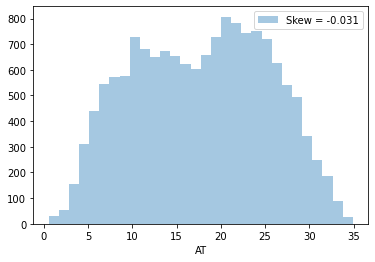

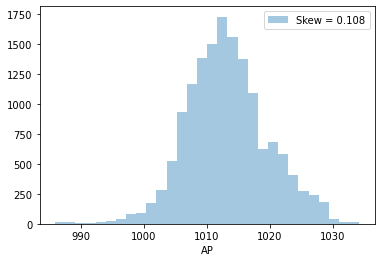

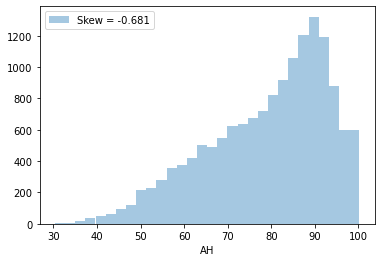

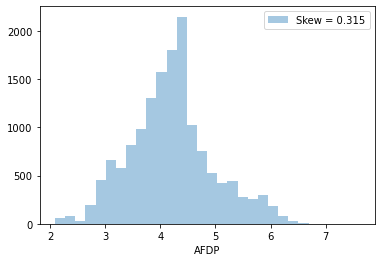

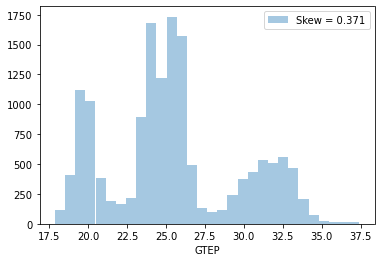

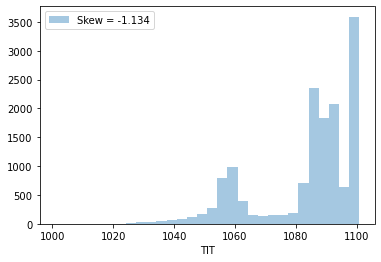

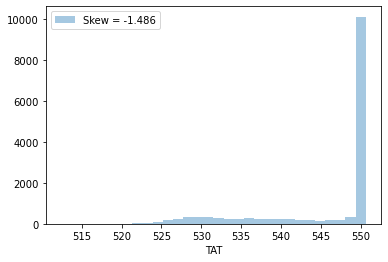

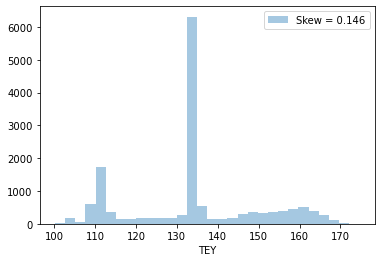

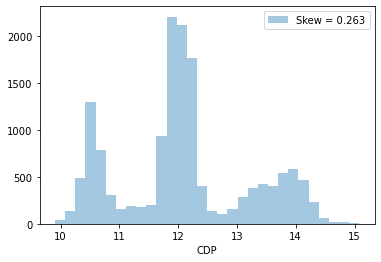

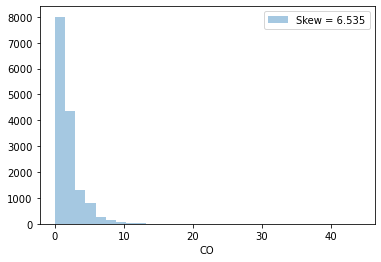

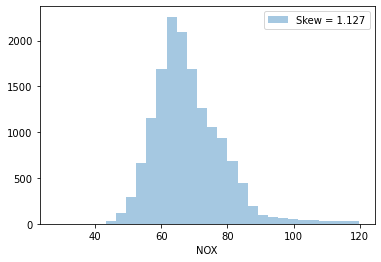

In [8]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<AxesSubplot:xlabel='TEY', ylabel='Count'>

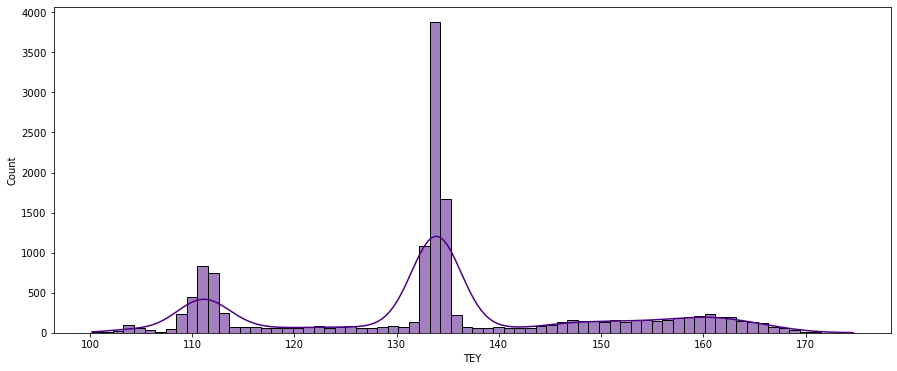

In [9]:
plt.figure(figsize=(15,6))
sns.histplot(data,x="TEY",color="indigo",kde=True)

<AxesSubplot:>

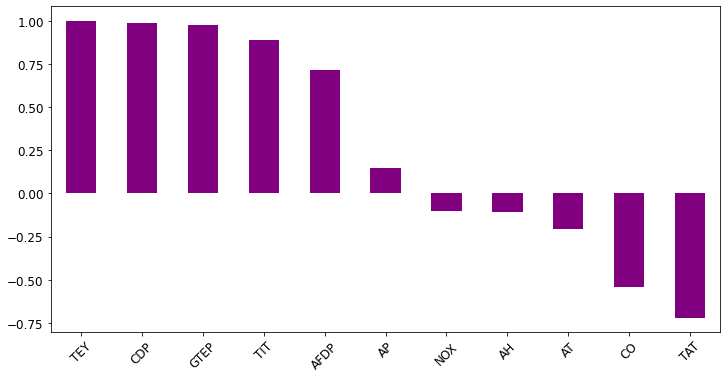

In [10]:
data.corr()["TEY"].sort_values(ascending=0).plot.bar(figsize = (12, 6), 
        fontsize = 12, 
        color = 'purple',
        rot = 45, grid = False)

<Figure size 1440x1440 with 0 Axes>

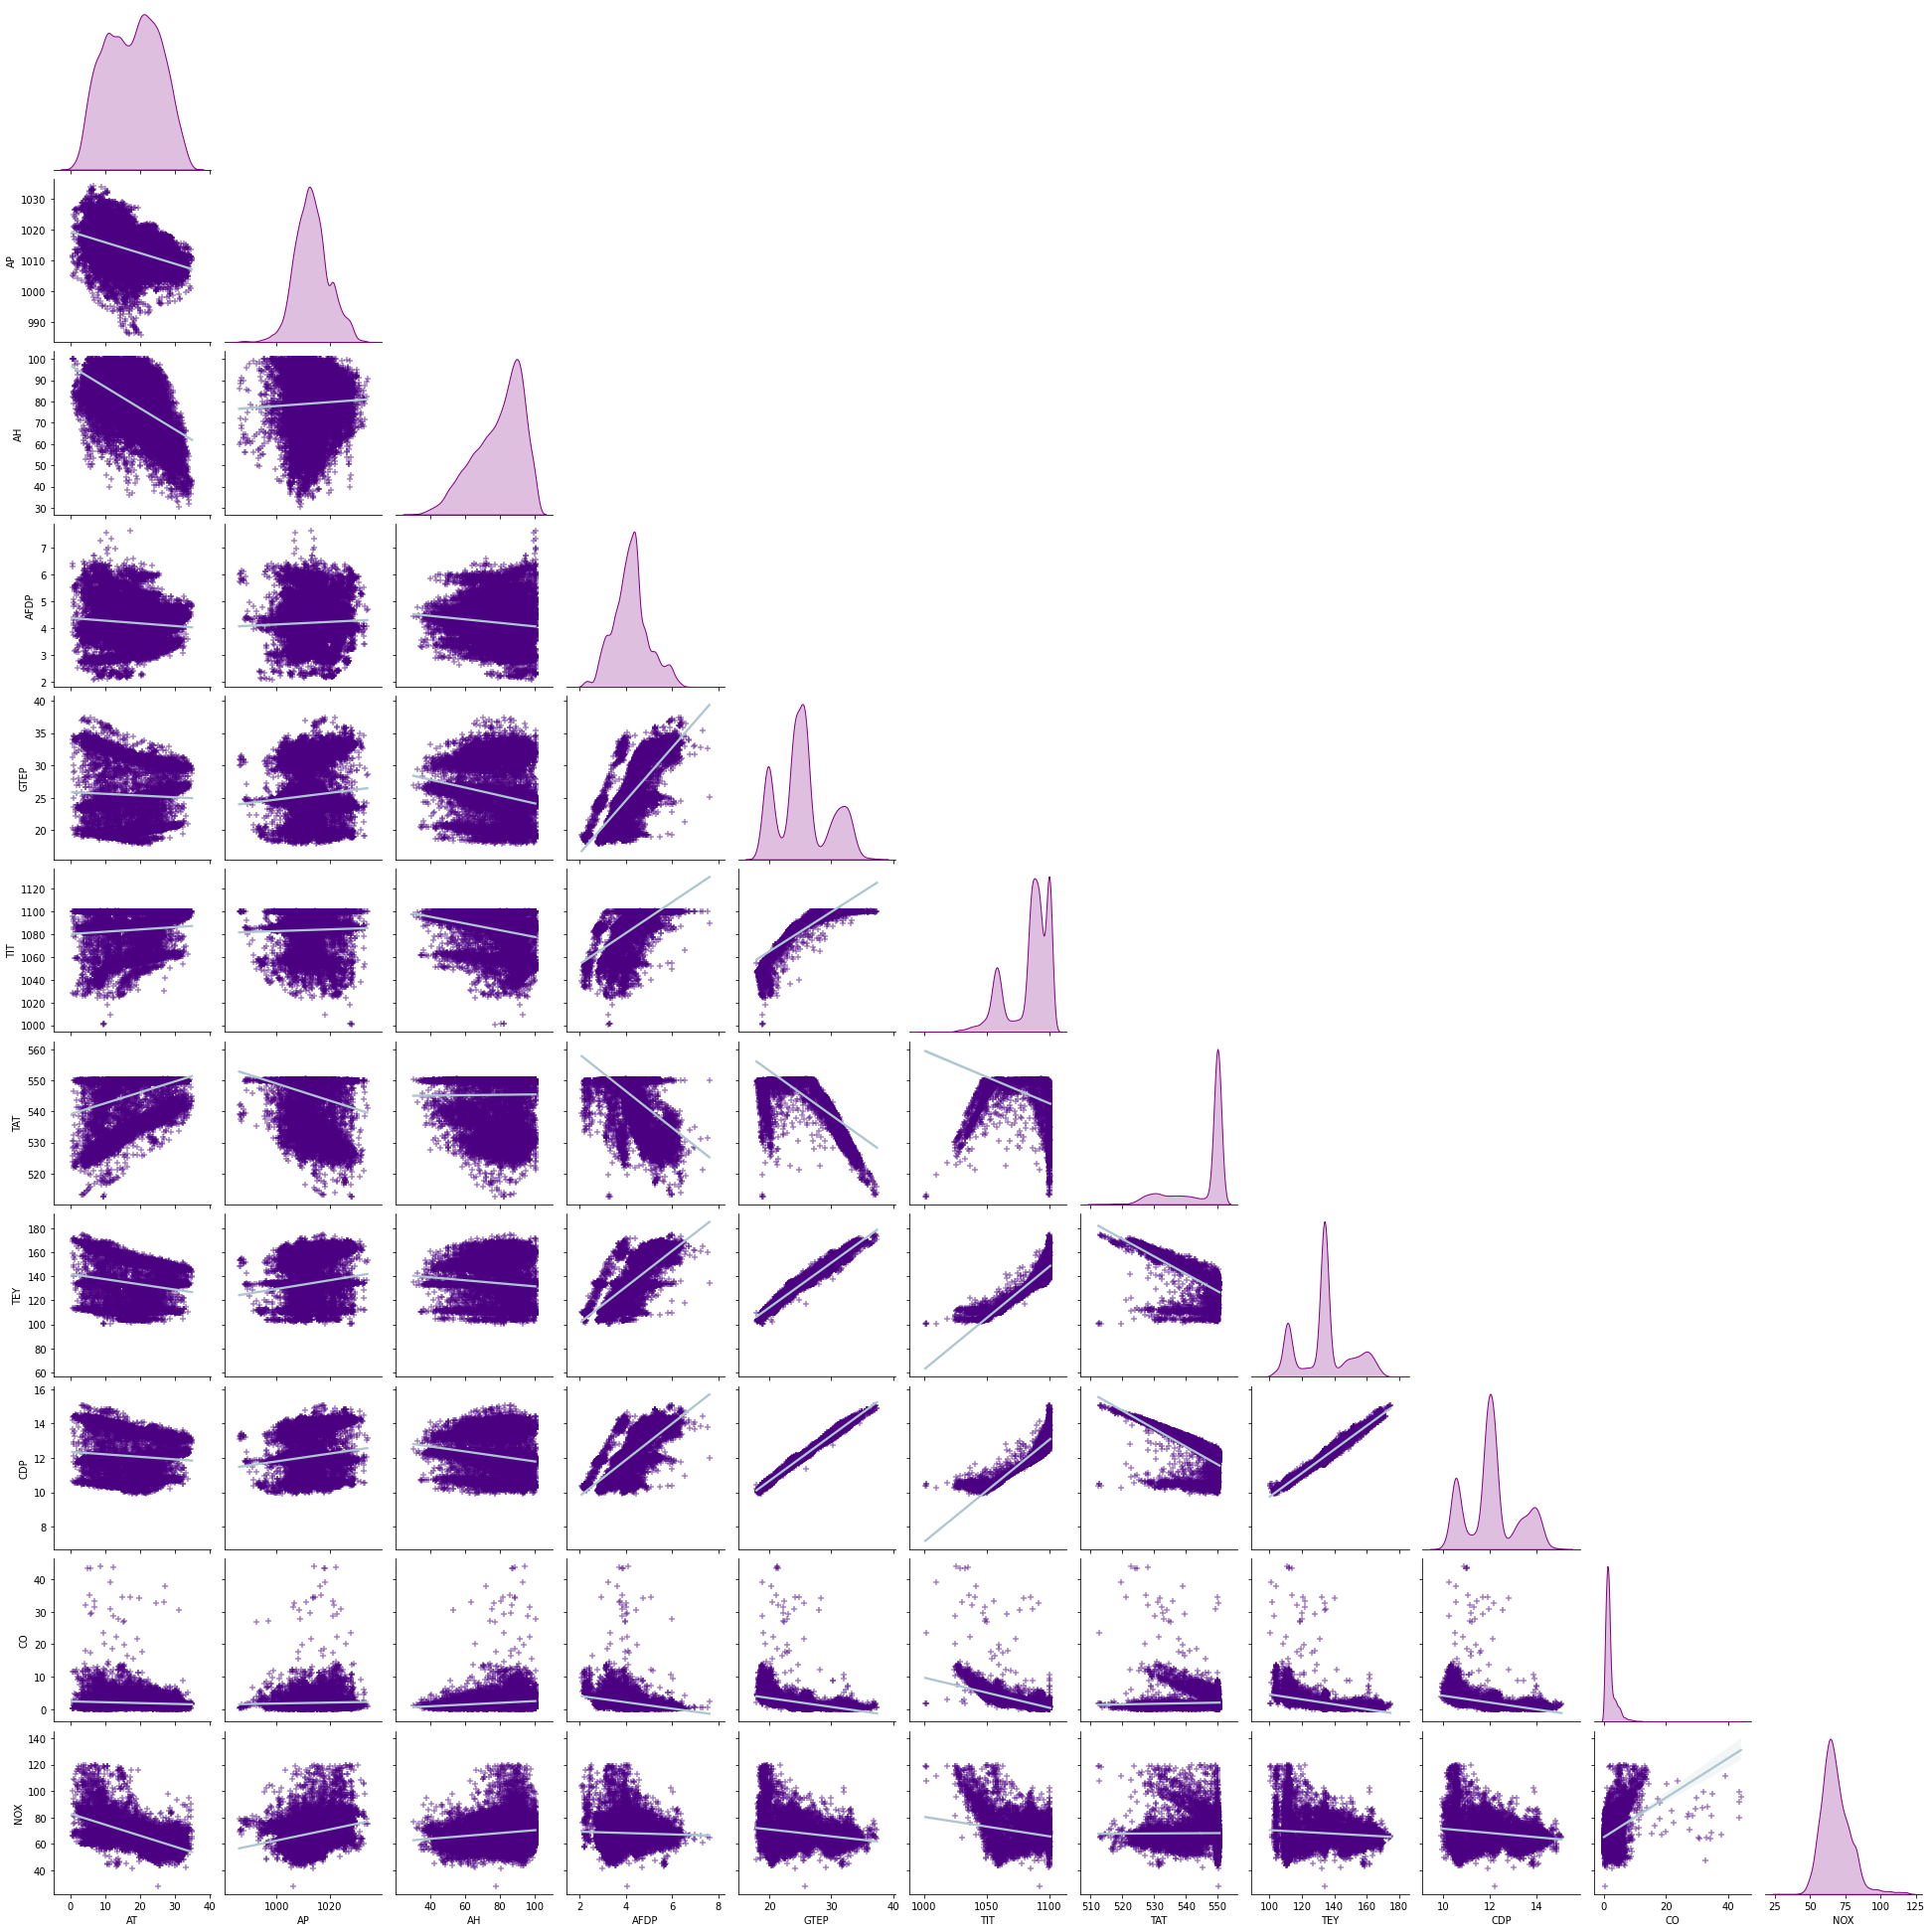

In [97]:
plt.figure(figsize=(20,20))
sns.pairplot(dataset,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': "indigo"}},
               corner=True,
                 diag_kws= {'color': 'purple'})

<AxesSubplot:>

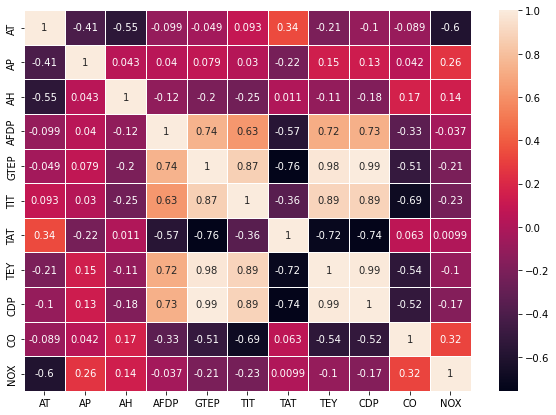

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, linewidth=1)

### Normalising the dats

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
std_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = std_data.drop('TEY',axis=1)
y = std_data[['TEY']]

# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

In [15]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)


# summarize scores
scores = fit.scores_
features = fit.transform(x)

score_df = pd.DataFrame(list(zip(scores, x.columns)),columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df


,Score,Feature
7,1.712681,CDP
4,1.599930,GTEP
5,1.324848,TIT
6,0.895639,TAT
3,0.660848,AFDP
8,0.512404,CO
0,0.412802,AT
9,0.300765,NOX
1,0.138688,AP
2,0.097738,AH


<AxesSubplot:xlabel='Feature', ylabel='Score'>

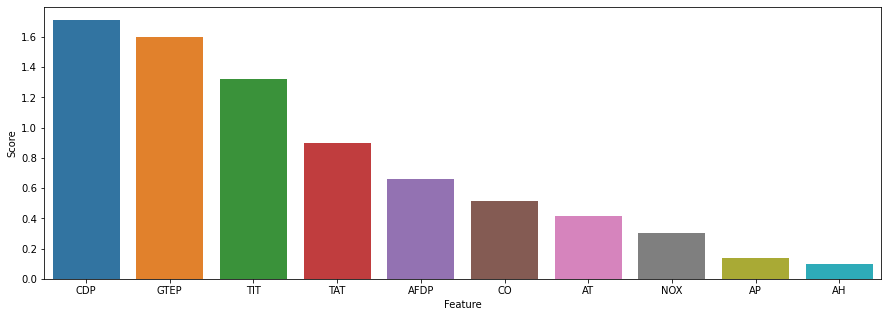

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score',ascending=0).Feature)


In [17]:
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential

In [18]:

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model


In [19]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')


INFO:tensorflow:Reloading Oracle from existing project project\Gas Turbine\oracle.json
INFO:tensorflow:Reloading Tuner from project\Gas Turbine\tuner0.json


In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 17
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [21]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [22]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 9
units_0: 32
units_1: 32
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.02150866637627284
Trial summary
Hyperparameters:
num_layers: 15
units_0: 32
units_1: 64
learning_rate: 0.001
units_2: 96
units_3: 32
units_4: 64
units_5: 64
units_6: 32
units_7: 96
units_8: 64
units_9: 64
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
Score: 0.02209874118367831
Trial summary
Hyperparameters:
num_layers: 15
units_0: 64
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 96
units_4: 64
units_5: 96
units_6: 64
units_7: 64
units_8: 64
units_9: 64
units_10: 64
units_11: 32
units_12: 96
units_13: 32
units_14: 64
Score: 0.023043297852079075
Trial summary
Hyperparameters:
num_layers: 7
units_0: 64
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 64
units_4: 64
units_5: 96
units_6: 32
units_7: 32
units_8:

In [23]:
import tensorflow  as tf
from keras.layers import Dense

In [24]:
len(data.columns)

11

### First Model 

In [25]:
# since we have continuous ouput, AF is not required in the o/p layer
model = tf.keras.models.Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 10)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                550       
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,591
Trainable params: 1,591
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse","accuracy"])

In [62]:
model.fit(x_train, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
158/158 [==============================] - 2s 7ms/step - loss: 0.2466 - mae: 0.2776 - mse: 0.2466 - accuracy: 0.0000e+00 - val_loss: 0.0159 - val_mae: 0.0835 - val_mse: 0.0159 - val_accuracy: 0.0000e+00
Epoch 2/100
158/158 [==============================] - 1s 4ms/step - loss: 0.0089 - mae: 0.0614 - mse: 0.0089 - accuracy: 0.0000e+00 - val_loss: 0.0056 - val_mae: 0.0511 - val_mse: 0.0056 - val_accuracy: 0.0000e+00
Epoch 3/100
158/158 [==============================] - 1s 4ms/step - loss: 0.0045 - mae: 0.0459 - mse: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_mae: 0.0437 - val_mse: 0.0040 - val_accuracy: 0.0000e+00
Epoch 4/100
158/158 [==============================] - 1s 4ms/step - loss: 0.0035 - mae: 0.0414 - mse: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_mae: 0.0393 - val_mse: 0.0032 - val_accuracy: 0.0000e+00
Epoch 5/100
158/158 [==============================] - 1s 4ms/step - loss: 0.0030 - mae: 0.0383 - mse: 0.0030 - accuracy: 0.0000e+00 - val_l

Epoch 39/100
158/158 [==============================] - 0s 3ms/step - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_mae: 0.0247 - val_mse: 0.0012 - val_accuracy: 0.0000e+00
Epoch 40/100
158/158 [==============================] - 0s 3ms/step - loss: 0.0013 - mae: 0.0264 - mse: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_mae: 0.0245 - val_mse: 0.0012 - val_accuracy: 0.0000e+00
Epoch 41/100
158/158 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0246 - mse: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_mae: 0.0265 - val_mse: 0.0013 - val_accuracy: 0.0000e+00
Epoch 42/100
158/158 [==============================] - 0s 3ms/step - loss: 0.0012 - mae: 0.0248 - mse: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_mae: 0.0239 - val_mse: 0.0011 - val_accuracy: 0.0000e+00
Epoch 43/100
158/158 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0253 - mse: 0.0012 - accuracy: 0.0000e+00 - 

Epoch 77/100
158/158 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0253 - mse: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_mae: 0.0254 - val_mse: 0.0013 - val_accuracy: 0.0000e+00
Epoch 78/100
158/158 [==============================] - 1s 4ms/step - loss: 0.0011 - mae: 0.0243 - mse: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_mae: 0.0255 - val_mse: 0.0012 - val_accuracy: 0.0000e+00
Epoch 79/100
158/158 [==============================] - 1s 4ms/step - loss: 0.0012 - mae: 0.0244 - mse: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_mae: 0.0247 - val_mse: 0.0012 - val_accuracy: 0.0000e+00
Epoch 80/100
158/158 [==============================] - 1s 4ms/step - loss: 0.0012 - mae: 0.0243 - mse: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_mae: 0.0237 - val_mse: 0.0011 - val_accuracy: 0.0000e+00
Epoch 81/100
158/158 [==============================] - 1s 4ms/step - loss: 0.0011 - mae: 0.0240 - mse: 0.0011 - accuracy: 0.0000e+00 - 

### Hyper parameter tunning for batch_size and no. of epochs

In [28]:
def toFindBestParams(x_train, y_train, x_test, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))  
                    
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable


In [63]:
def toFindBestParams(x_train, y_train, x_test, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))  
                    
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train, y_train, x_test, y_test)
finalParamTable


118/118 [==============================] - 3s 1ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    74.908921
dtype: float64
118/118 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    91.318674
dtype: float64
118/118 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    84.026389
dtype: float64
118/118 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    96.645321
dtype: float64
118/118 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    87.739869
dtype: float64
118/118 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    94.456238
dtype: float64
118/118 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    91.770387
dtype: float64
118/118 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    89.436147
dtype: float64
118/

,batchsize,epochs,Accuracy
0,5,5,TEY 74.908921 dtype: float64
0,5,10,TEY 91.318674 dtype: float64
0,5,50,TEY 84.026389 dtype: float64
0,5,100,TEY 96.645321 dtype: float64
0,10,5,TEY 87.739869 dtype: float64
0,10,10,TEY 94.456238 dtype: float64
0,10,50,TEY 91.770387 dtype: float64
0,10,100,TEY 89.436147 dtype: float64
0,15,5,TEY 72.467461 dtype: float64
0,15,10,TEY 85.56368 dtype: float64


for batch size= 5 and epochs= 100 accuracy is Heigh i,e. 96.64 %

### Model

In [35]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
#fitting the model to best params
model.fit(x_train,y_train, batch_size=5 , epochs = 100)

Epoch 1/100
2256/2256 [==============================] - 7s 3ms/step - loss: 0.0012
Epoch 2/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 3/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 4/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 5/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 6/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 7/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 8/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 9/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 10/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 11/100
2256/2256 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 12/100
2256/2256 [==============================] - 5s 2ms/step - lo

#### Finding predicted values for test data

In [30]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

118/118 [==============================] - 0s 2ms/step
(3760, 12)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,Actual,Predicted
8185,-1.295034,0.483697,0.728184,1.062795,1.821837,0.974223,-2.239381,1.807215,-0.691358,-0.357197,1.904806,1.877227
8994,-1.586410,0.811282,-0.098251,-0.212050,-0.486864,-0.042280,0.587783,-0.319403,-0.007020,-0.746013,-0.032754,-0.058916
8944,-1.200871,2.121622,0.379601,1.633192,1.789731,0.992375,-2.358874,1.918713,-0.694018,-0.444778,1.846054,1.853188
3451,0.238527,0.312104,0.873910,-1.169860,-1.403779,-1.669894,0.567443,-1.634716,1.525787,-1.103885,-1.541991,-1.548973
8236,-1.477354,0.530495,0.720934,-0.567233,-0.451644,0.042429,0.573799,-0.260482,-0.153231,1.083363,0.051900,0.020370
3508,1.771520,-0.514658,-2.837035,0.277577,0.343799,0.786654,0.600495,0.256216,-0.364829,0.623392,0.065798,0.041339
6768,-0.290383,1.154466,-0.643093,-1.760516,-0.211574,0.242099,0.590325,-0.062867,-0.505505,-0.502370,0.021576,0.052491
11903,1.556972,-1.154229,-0.918668,0.300993,1.098750,0.998425,-0.535964,0.951492,-0.661310,-1.381051,0.767666,0.810870
9257,-1.143755,2.277615,0.384168,1.862746,1.741573,0.998425,-2.376671,1.896958,-0.383325,-0.702557,1.832787,1.848939
2911,1.350742,0.062516,-1.840949,-0.009464,0.130083,0.568832,0.575071,0.075825,-0.243999,0.125314,-0.022646,-0.030909


#### Plotting Actual values verses Prediced values

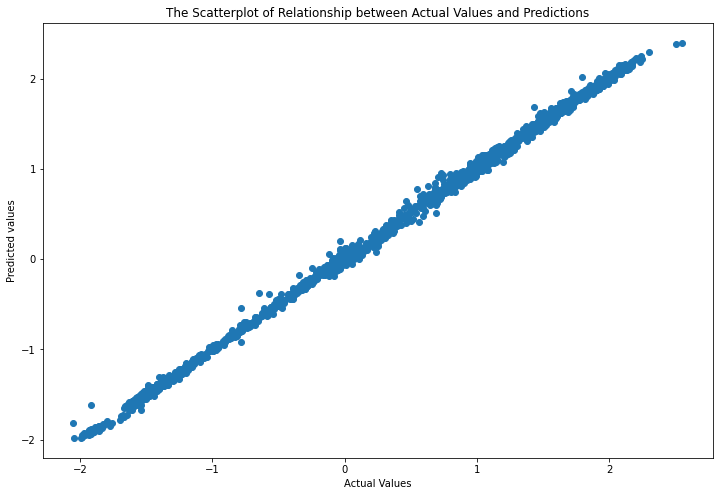

In [31]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

Predicted values are 96 % Accuracy